In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./DATA/cancer_classification.csv')

In [3]:
#exploratory data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

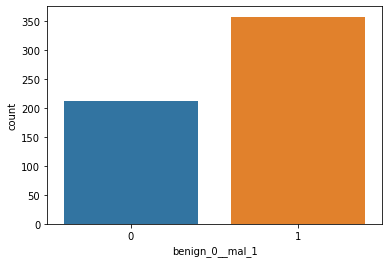

In [5]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

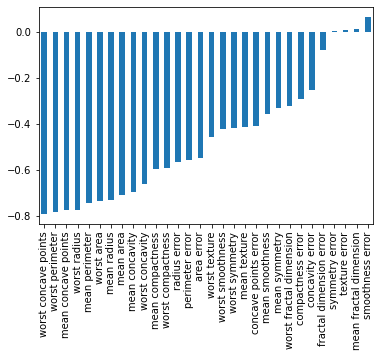

In [6]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

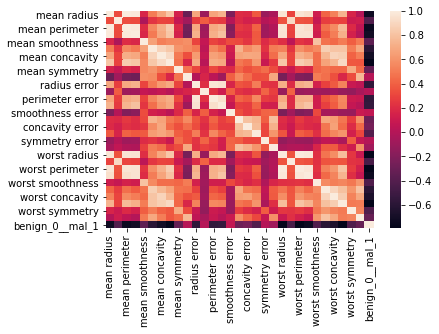

In [7]:
sns.heatmap(df.corr())

In [8]:
#train test split
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
#scale data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#create model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [14]:
X_train.shape

(426, 30)

In [15]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary Classification is sigmoid
model.add(Dense(1, activation='sigmoid'))

#compile
model.compile(loss='binary_crossentropy', optimizer='adam')

In [16]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6612 - val_loss: 0.6288
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6075 - val_loss: 0.5761
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5564 - val_loss: 0.5248
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5038 - val_loss: 0.4676
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4461 - val_loss: 0.4089
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3926 - val_loss: 0.3591
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3459 - val_loss: 0.3171
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3120 - val_loss: 0.2808
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2786 - val_loss: 0.2557
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2544 - val_loss: 0.2323
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0506 - val_loss: 0.1235
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0538 - val_loss: 0.1148
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0514 - val_loss: 0.1224
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0481 - val_loss: 0.1189
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0477 - val_loss: 0.1222
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0466 - val_loss: 0.1198
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0467 - val_loss: 0.1274
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0462 - val_loss: 0.1233
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0460 - val_loss: 0.1262
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0522 - val_loss: 0.1221
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0335 - val_loss: 0.1445
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0328 - val_loss: 0.1235
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0324 - val_loss: 0.1225
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.1506
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0325 - val_loss: 0.1161
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0328 - val_loss: 0.1505
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0323 - val_loss: 0.1182
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0320 - val_loss: 0.1607
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0312 - val_loss: 0.1194
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0300 - val_loss: 0.1387
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.1375
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0193 - val_loss: 0.1234
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.1291
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0242 - val_loss: 0.1524
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.1086
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0195 - val_loss: 0.1377
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.1144
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.1313
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0190 - val_loss: 0.1192
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.1280
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 0.1291
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.1272
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.1372
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.1342
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.1519
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.1266
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.1319
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.1426
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.1317
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.1349
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.1276
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.1649
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.1301
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.1521
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.1435
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.1426
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.1241
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.1575
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.1211
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.1573
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.1624
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.1263
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.1554
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.1336
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.2419
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.1285
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.1735
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0274 - val_loss: 0.2146
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0190 - val_loss: 0.1248
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0916
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.1501
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.1597
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.1414
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.1702
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.1426
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.1641
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.1547
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.1587
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.1540
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.1583
Epoc

In [17]:
#plot loss and val loss 
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

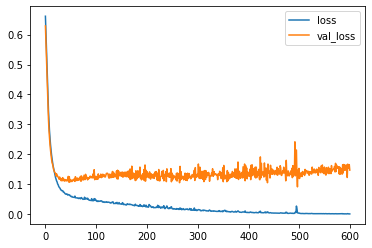

In [18]:
losses.plot()

Validation loss is too high and seperates froom loss. This is a sign of overfitting. We need to use a method to stop the loss seperation from happening. 

In [19]:
#recreate model
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary Classification is sigmoid
model.add(Dense(1, activation='sigmoid'))

#compile
model.compile(loss='binary_crossentropy', optimizer='adam')

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [25]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=25)

In [27]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6721 - val_loss: 0.6327
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6122 - val_loss: 0.5794
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5629 - val_loss: 0.5325
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5172 - val_loss: 0.4847
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4706 - val_loss: 0.4350
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4233 - val_loss: 0.3871
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3782 - val_loss: 0.3423
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3356 - val_loss: 0.2996
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2992 - val_loss: 0.2673
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2707 - val_loss: 0.2445
Epoch 11

In [28]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

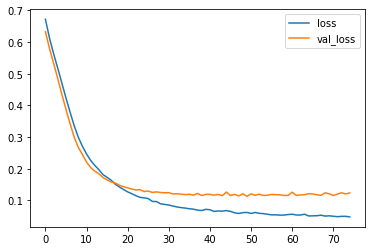

In [29]:
model_loss.plot()

In [31]:
#recreate model
model = Sequential()

#dropout is another method to reduce loss
model.add(Dense(30, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(rate=0.5))

# Binary Classification is sigmoid
model.add(Dense(1, activation='sigmoid'))

#compile
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=25)

In [33]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.7131 - val_loss: 0.6902
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6961 - val_loss: 0.6658
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6950 - val_loss: 0.6506
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6711 - val_loss: 0.6268
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6321 - val_loss: 0.6010
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6312 - val_loss: 0.5723
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6148 - val_loss: 0.5469
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5777 - val_loss: 0.5239
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5525 - val_loss: 0.4976
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5296 - val_loss: 0.4727
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1254 - val_loss: 0.1073
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1471 - val_loss: 0.1103
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1289 - val_loss: 0.1044
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1416 - val_loss: 0.1012
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1187 - val_loss: 0.1043
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1153 - val_loss: 0.1005
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1282 - val_loss: 0.1031
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1278 - val_loss: 0.1016
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1224 - val_loss: 0.0999
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1026 - val_loss: 0.1139
Epoch 93/600


In [34]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

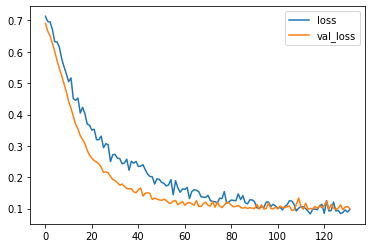

In [35]:
model_loss.plot()

In [43]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [46]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]
